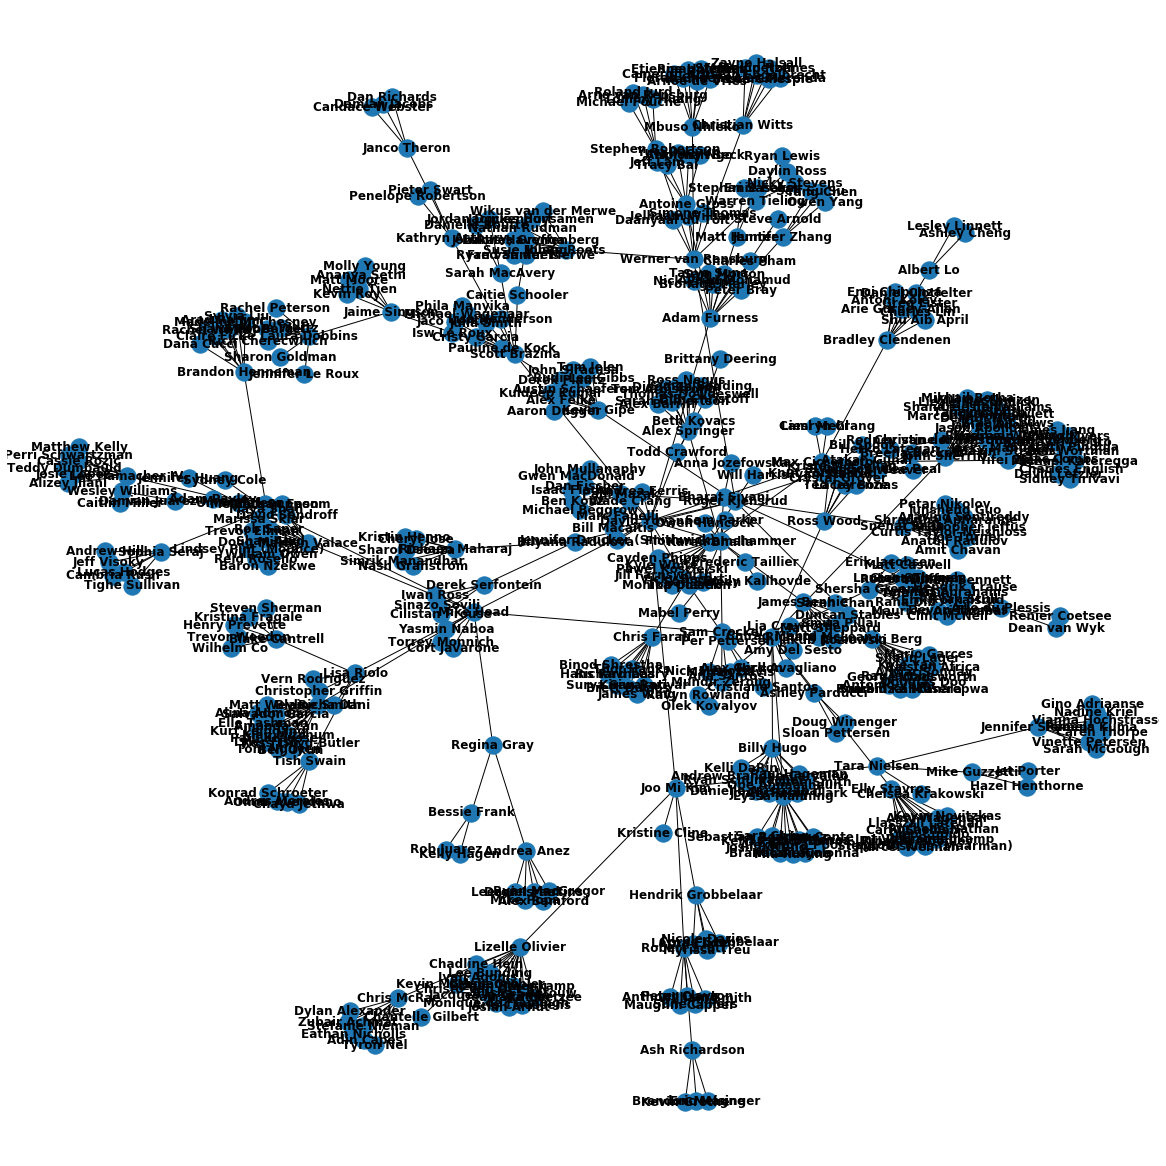

In [2]:
import json
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rc('figure', figsize=[16,16])

date = datetime.strptime('2020-01-14', '%Y-%m-%d')

G = nx.Graph()

with open('../../data/raw/data.json') as json_file:
    data = json.load(json_file)
    G.add_node("Top position")
    for person1 in data['directReports']:
        if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d'):
            G.add_node(person1['name'])
            G.add_edge(person1['name'], "Top position")
        else:
            person1_name = "Top position"
        for person2 in person1['directReports']:
            if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d'):
                G.add_node(person2['name'])
                G.add_edge(person2['name'], person1['name'])
            else:
                person2_name = person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
            for person3 in person2['directReports']:
                if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d'):
                    G.add_node(person3['name'])
                    G.add_edge(person3['name'], person2['name'])
                else:
                    person3_name = person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                for person4 in person3['directReports']:
                    if date > datetime.strptime(person4['hireDate'], '%Y-%m-%d'):
                        G.add_node(person4['name'])
                        G.add_edge(person4['name'], person3['name'])
                    else:
                        person4_name = person3['name'] if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d') else person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                    for person5 in person4['directReports']:
                        if date > datetime.strptime(person5['hireDate'], '%Y-%m-%d'):
                            G.add_node(person5['name'])
                            G.add_edge(person5['name'], person4['name'])                                    
                        else:
                            pass
        
nx.draw(G, with_labels=True, font_weight='bold')        

In [21]:
data['directReports'][0]

{'id': '644',
 'name': 'David Yovanno',
 'photo': 'https://920eabaf46d910483404-19ee3f1415dd08db8fd3e2767a3601bc.ssl.cf1.rackcdn.com/photos/644-1-4.jpg',
 'divisionName': 'G&A',
 'departmentName': 'G&A',
 'location': 'US-CA-Santa Barbara',
 'hireDate': '2017-02-01',
 'jobTitle': 'Chief Executive Officer',
 'reportsTo': None,
 'phone': None,
 'email': 'dave@impact.com',
 'directReportsCount': 13,
 'levels': 5,
 'canSeeEmployee': False,
 'root': False,
 'directReports': [{'id': '419',
   'name': 'Scott Brazina',
   'photo': 'https://920eabaf46d910483404-19ee3f1415dd08db8fd3e2767a3601bc.ssl.cf1.rackcdn.com/photos/419-1-4.jpg',
   'divisionName': 'Marketing',
   'departmentName': 'Marketing',
   'location': 'US-NY-New York',
   'hireDate': '2017-11-09',
   'jobTitle': 'Chief Marketing Officer (Shared)',
   'reportsTo': '644',
   'phone': None,
   'email': 'scott@impact.com',
   'directReportsCount': 7,
   'levels': 3,
   'canSeeEmployee': False,
   'root': False,
   'directReports': [{'id'